In [3]:
#Gauss-Seidel method
#Works for SPD or strictly diagonally dominant matrices

import numpy as np

def GauSeiIT(A,u,f):
    N = np.size(u) 
    u[0] = (f[0] - np.dot(A[0,1:],u[1:]))/A[0,0] #Do first and last steps manually 
    for i in range(1,N-1): #range(a,b) = a,a+1,...,b-1
        # u[a:b] = [ u[a] , ... , u[b-1] ]
        u[i] = (f[i]-np.dot(A[i,:i],u[:i])-np.dot(A[i,i+1:],u[i+1:]))/A[i,i] #algorithm
    u[-1] = (f[-1]-np.dot(A[-1,:-1],u[:-1]))/A[-1,-1] #last step
    return u

def GauSei(A,u,f,n): #Do n steps of Gauss-Seidel
    u0 = u
    for i in range(n):
        #print(u0)
        u0 = GauSeiIT(A,u0,f)
    return u0


In [4]:
#SOR method

import numpy as np

def SORit(A,u,w,f):
    N = np.size(u)
    s0 = u[0]
    u[0] = (f[0] - np.dot(A[0,1:],u[1:]))/A[0,0]  #First step manually
    u[0] = (1-w)*s0+w*u[0]
    for i in range(1,N-1): #Do N-2 steps automatically following algorithm
        s = u[i]
        u[i] = (f[i]-np.dot(A[i,:i],u[:i])-np.dot(A[i,i+1:],u[i+1:]))/A[i,i]
        u[i] = (1-w)*s+w*u[i]
    sN = u[-1] #Do last step manually
    u[-1] = (f[-1]-np.dot(A[-1,:-1],u[:-1]))/A[-1,-1]
    u[-1] = (1-w)*sN+w*u[-1]
    return u

def SOR(A,u,w,f,N):
    u0 = u
    for i in range(N):
        u0 = SORit(A,u0,w,f)
    return u0

In [5]:
#SSOR
#Same method but with a forward and backwards SOR

import numpy as np

def SORit(A,u,w,f):
    N = np.size(u)
    s0 = u[0]
    u[0] = (f[0] - np.dot(A[0,1:],u[1:]))/A[0,0]  #First step manually
    u[0] = (1-w)*s0+w*u[0]
    for i in range(1,N-1): #Do N-2 steps automatically following algorithm
        s = u[i]
        u[i] = (f[i]-np.dot(A[i,:i],u[:i])-np.dot(A[i,i+1:],u[i+1:]))/A[i,i]
        u[i] = (1-w)*s+w*u[i]
    sN = u[-1] #Do last step manually
    u[-1] = (f[-1]-np.dot(A[-1,:-1],u[:-1]))/A[-1,-1]
    u[-1] = (1-w)*sN+w*u[-1]
    return u

def SORBWit(A,u,w,f): 
    N = np.size(u)
    sN = u[-1] #Do last step manually
    u[-1] = (f[-1]-np.dot(A[-1,:-1],u[:-1]))/A[-1,-1]
    u[-1] = (1-w)*sN+w*u[-1]
    for i in reversed(range(1,N-1)): #Do N-2 steps automatically following algorithm but reversed
        s = u[i]
        u[i] = (f[i]-np.dot(A[i,:i],u[:i])-np.dot(A[i,i+1:],u[i+1:]))/A[i,i]
        u[i] = (1-w)*s+w*u[i]
    s0 = u[0]
    u[0] = (f[0] - np.dot(A[0,1:],u[1:]))/A[0,0]  #First step manually
    u[0] = (1-w)*s0+w*u[0]
    return u

#SSOR that runs N iterations
def SSOR(A,u,w,f,N):
    u0 = u
    for i in range(N):
        u0 = SORit(A,u0,w,f)
        u0 = SORBWit(A,u0,w,f)
    return u0

#Define SSOR with stopping criteria on recidual vector / source vector (r/f)
def SSORsc(A,u0,w,f,sc,save_residual_lengths):
    u = u0
    r = np.matmul(A,u) - f
    err = np.linalg.norm(r,2) / np.linalg.norm(f,2)
    it = 0  #To count number of iterations
    residuals = [np.linalg.norm(r,2)]
    while err > sc:
        it = it+1
        u = SORit(A,u,w,f)
        u = SORBWit(A,u,w,f)
        r = np.dot(A,u) - f
        if save_residual_lengths == True:
            residuals.append(np.linalg.norm(r,2))
        err = np.linalg.norm(r,2) / np.linalg.norm(f,2)
        if err > 100:
            print("breaking")
            break
    print("number of iterations :", it)
    return u , np.array(residuals)


In [6]:
#For testing methods on SPD matrix
#Create random matrix and mupltiply with transpose to have SPD matrix:

msize = 5
M = np.random.rand(msize,msize)
A = np.dot(M,M.transpose()) + np.eye(msize)*msize #diagonally dominant to make it positive definite
#print(A)
usol = np.random.rand(msize)
print("solution: ",usol)
f = np.matmul(A,usol)

ugs = GauSei(A,np.zeros(msize),f,500)
usor = SOR(A,np.zeros(msize),0.5,f,30)
ussor = SSOR(A,np.zeros(msize),0.5,f,500)
solution = np.linalg.solve(A,f)

print("GS: ", ugs)
print("SOR: ", usor)
print("SSOR: ", ussor)
print("numpy: ", solution)


solution:  [0.26360318 0.01394181 0.98459654 0.48690535 0.53944171]
GS:  [0.26360318 0.01394181 0.98459654 0.48690535 0.53944171]
SOR:  [0.26360312 0.01394186 0.98459652 0.48690538 0.53944168]
SSOR:  [0.26360318 0.01394181 0.98459654 0.48690535 0.53944171]
numpy:  [0.26360318 0.01394181 0.98459654 0.48690535 0.53944171]


In [7]:
M = np.array([[16,4],[-1,10]])
b = np.array([3,10])
ugs = GauSei(M,[0,0],b,38)
usor = SOR(M,[0,0],0.5,b,38)
ussor = SSOR(M,[0,0],0.5,b,50)

print("GS: ", ugs)
print("SOR: ", usor)
print("SSOR: ", ussor)


GS:  [-0.06097560975609756, 0.9939024390243902]
SOR:  [-0.06097560976345765, 0.9939024390257305]
SSOR:  [-0.06097560975609756, 0.9939024390243902]


In [8]:
M = np.array([[4,-1,-6,0],[-5,-4,10,8],[0,9,4,-2],[1,0,-7,5]])
f = np.array([0,0,-12,-6])

ugs = GauSei(M,np.zeros(4),f,30)
usor = SOR(M,np.zeros(4),0.5,f,50)
ussor = SSOR(M,np.zeros(4),0.5,f,30)
solution = np.linalg.solve(M,f)

print("GS: ", ugs)
print("SOR: ", usor)
print("SSOR: ", ussor)
print("numpy: ", solution)

print("test f: ", np.dot(M,ussor))

GS:  [-1.30816762e+25 -3.46513578e+25  7.11469291e+25  1.02222036e+26]
SOR:  [-0.31858407 -1.59292035  0.05309735 -1.0619469 ]
SSOR:  [2.42657201e+14 5.61681756e+14 3.24744965e+14 1.60969796e+14]
numpy:  [-0.31858407 -1.59292035  0.05309735 -1.0619469 ]
test f:  [-1.53952274e+15  1.07519499e+15  6.03217607e+15 -1.22570857e+15]


number of iterations : 71
err = 9.48543960468663e-10
infty norm distance between sols =  5.461326946232248e-10


Text(0.5, 1.0, 'A single plot')

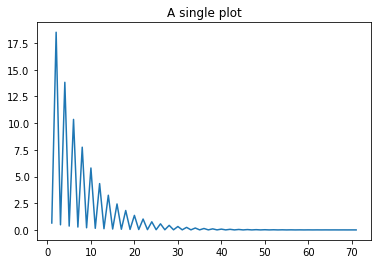

In [9]:
#Test stopping criterion

msize = 10
M = np.random.rand(msize,msize)
A = np.dot(M,M.transpose()) + np.eye(msize)*msize #diagonally dominant to make it positive definite
#print(A)
usol = np.random.rand(msize)
for i in range(msize-4):
    usol[i]=0
#print("Exact solution: ",usol)
f = np.dot(A,usol)

ussor_sc , res = SSORsc(A,np.zeros(msize),1.5,f,10E-10,True)
#print("SSOR solution: ",ussor_sc)

r = np.dot(A,ussor_sc)-f
err = np.linalg.norm(r,2) / np.linalg.norm(f,2)

print("err =" , err)

print("infty norm distance between sols = ", np.linalg.norm(usol-ussor_sc,np.Inf))

from matplotlib import pyplot as plt
iterations = np.size(res)-1
its = np.linspace(1,iterations,iterations)

resdif = res[1:]
for i in range(iterations):
    resdif[i] = res[i+1]/res[i]

fig, ax = plt.subplots()
ax.plot(its,resdif)
ax.set_title('A single plot')

In [13]:
#SSOR
#Same method but with a forward and backwards SOR

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as LA

def spSORit(A,u,w,f):
    N = np.shape(u)[0]
    s0 = u[0]
    u[0] = ( f[0] - A[0,1:].dot(u[1:]) ) /A[0,0]  #First step manually
    u[0] = (1-w)*s0+w*u[0]
    for i in range(1,N-1): #Do N-2 steps automatically following algorithm
        s = u[i]
        u[i] = (f[i]-A[i,:i].dot(u[:i])-A[i,i+1:].dot(u[i+1:]))/A[i,i]
        u[i] = (1-w)*s+w*u[i]
    sN = u[-1] #Do last step manually
    u[-1] = (f[-1]-A[-1,:-1].dot(u[:-1]))/A[-1,-1]
    u[-1] = (1-w)*sN+w*u[-1]
    return u

def spSORBWit(A,u,w,f): 
    N = np.shape(u)[0]
    sN = u[-1] #Do last step manually
    u[-1] = (f[-1]-A[-1,:-1].dot(u[:-1]))/A[-1,-1]
    u[-1] = (1-w)*sN+w*u[-1]
    for i in reversed(range(1,N-1)): #Do N-2 steps automatically following algorithm but reversed
        s = u[i]
        u[i] = (f[i]-A[i,:i].dot(u[:i])-A[i,i+1:].dot(u[i+1:]))/A[i,i]
        u[i] = (1-w)*s+w*u[i]
    s0 = u[0]
    u[0] = (f[0] - A[0,1:].dot(u[1:]))/A[0,0]  #First step manually
    u[0] = (1-w)*s0+w*u[0]
    return u

#SSOR that runs N iterations
def spSSOR(A,u,w,f,N):
    u0 = u
    for i in range(N):
        u0 = SORit(A,u0,w,f)
        u0 = SORBWit(A,u0,w,f)
    return u0

#Define SSOR with stopping criteria on recidual vector / source vector (r/f)

def spSSORsc(A,u0,w,f,Stopping_criteria):  #A is csr_matrix while u0, f are dense np.array
    u = u0  #otherwise everything should be sparse
    r = A.dot(u) - f
    err = np.linalg.norm(r,2) / np.linalg.norm(f,2)
    it = 0  #To count number of iterations
    reduces_residuals = [err]
    while err > Stopping_criteria:
        it = it+1
        u = spSORit(A,u,w,f)
        u = spSORBWit(A,u,w,f)
        f_it = A.dot(u)
        r = f_it - f
        err = np.linalg.norm(r,2) / np.linalg.norm(f,2)
        reduces_residuals.append(err)
        #if it > 2000:
        #    print("Over", it ,"iterations. err is: ",err)
    print("number of iterations :", it)
    return u , np.array(reduces_residuals)



In [17]:
N = 5
A = sp.csr_matrix(sp.diags([-1, 4, -1], [-1, 0, 1], shape=(N, N)))
u_ex = np.ones(N)
f = A.dot(u_ex)
print(f)
u0 = np.zeros(N)

print(A.toarray())
print("norm f:",np.linalg.norm(f,2))
u,res = spSSORsc(A,u0,1.5,f,10E-10)


print(u)

[3. 2. 2. 2. 3.]
[[ 4. -1.  0.  0.  0.]
 [-1.  4. -1.  0.  0.]
 [ 0. -1.  4. -1.  0.]
 [ 0.  0. -1.  4. -1.]
 [ 0.  0.  0. -1.  4.]]
norm f: 5.477225575051661
number of iterations : 21
[1. 1. 1. 1. 1.]
